In [10]:
# imports
import numpy as np 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10

import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup

In [11]:
df = pd.read_csv('data/golf_stats.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,NAME,ADJUSTMENT,HOLES,RELATIVE_PAR,SG_PUTTING,SG_OTT,SG_APR,SG_ARG,WINS,TOP_10S,1ST,2ND,3RD,YEAR,SCORE_AVERAGE,DRIVING_DISTANCE,DRIVING_ACCURACY,DRIVING_USAGE,GREENS_IN_REGULATION,TOTAL_SG
0,Rory McIlroy,-40.848,972.0,-0.33,2.336,1.072,1.002,0.273,4.0,10.0,4.0,2.0,1.0,2012,68.873185,310.075472,0.566138,0.109053,0.663580,2.347
1,Tiger Woods,-58.454,1206.0,-0.29,16.282,0.553,1.224,0.194,3.0,9.0,3.0,1.0,2.0,2012,68.903672,297.432836,0.639274,0.111111,0.675788,1.971
2,Jim Furyk,-66.464,1512.0,-0.25,27.493,0.225,0.830,0.275,0.0,7.0,0.0,2.0,1.0,2012,69.304000,279.981928,0.707088,0.109788,0.681878,1.330
3,Jason Dufner,-35.636,1476.0,-0.29,9.777,0.553,0.519,0.222,2.0,8.0,2.0,1.0,0.0,2012,69.455659,292.388889,0.669002,0.109756,0.691734,1.294
4,Matt Kuchar,-45.884,1476.0,-0.27,31.151,0.110,0.490,0.309,1.0,9.0,1.0,0.0,1.0,2012,69.477024,286.195122,0.650613,0.111111,0.653794,0.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,Michael Gellerman,22.247,450.0,-0.22,-0.568,-0.202,-1.771,0.276,0.0,0.0,0.0,0.0,0.0,2021,73.529880,290.440000,0.631429,0.111111,0.664444,-1.697
1888,Hunter Mahan,27.152,792.0,-0.26,3.552,0.020,-1.217,-1.013,0.0,0.0,0.0,0.0,0.0,2021,73.571636,296.181818,0.549020,0.111111,0.573232,-2.210
1889,Martin Trainer,21.973,738.0,-0.29,-2.960,-0.546,-1.540,0.150,0.0,0.0,0.0,0.0,0.0,2021,73.609098,302.670732,0.471930,0.111111,0.540650,-1.936
1890,Kevin Stadler,10.106,522.0,-0.27,-13.049,-0.670,-0.316,-0.583,0.0,0.0,0.0,0.0,0.0,2021,73.900207,283.362069,0.542289,0.111111,0.593870,-1.569


###  In order to make presumptions I´m going to take what I consider to be the most important golf metrics, and I am going to choose them depending on it´s correlation to score average

In [12]:
df.corr(method = 'pearson')

,ADJUSTMENT,HOLES,RELATIVE_PAR,SG_PUTTING,SG_OTT,SG_APR,SG_ARG,WINS,TOP_10S,1ST,2ND,3RD,YEAR,SCORE_AVERAGE,DRIVING_DISTANCE,DRIVING_ACCURACY,DRIVING_USAGE,GREENS_IN_REGULATION,TOTAL_SG
ADJUSTMENT,1.000000,-0.024341,-0.148849,-0.046016,-0.170351,-0.244015,-0.126014,-0.200406,-0.311048,-0.202549,-0.217304,-0.116072,0.569828,0.322757,0.035764,0.071772,0.003712,0.206238,-0.283178
HOLES,-0.024341,1.000000,0.034969,0.175047,0.165920,0.203504,0.071758,0.112082,0.342235,0.113508,0.135017,0.112801,-0.378414,-0.334029,-0.069518,0.147246,-0.068385,0.171209,0.238135
RELATIVE_PAR,-0.148849,0.034969,1.000000,-0.463721,-0.223867,-0.203340,-0.157690,-0.301447,-0.442721,-0.302898,-0.260091,-0.233740,-0.392202,0.444431,-0.422218,0.178937,0.070347,-0.056085,-0.300084
SG_PUTTING,-0.046016,0.175047,-0.463721,1.000000,-0.180044,-0.109906,0.197627,0.155364,0.314336,0.159216,0.153892,0.140106,-0.000755,-0.339557,-0.115859,-0.028088,0.029475,-0.178208,-0.098351
SG_OTT,-0.170351,0.165920,-0.223867,-0.180044,1.000000,0.336802,-0.144267,0.262281,0.447077,0.261226,0.268647,0.182501,-0.023749,-0.553454,0.564758,0.219818,-0.081394,0.564440,0.711593
SG_APR,-0.244015,0.203504,-0.203340,-0.109906,0.336802,1.000000,0.121045,0.272307,0.516766,0.270324,0.329995,0.240610,-0.044431,-0.684023,0.139529,0.197720,-0.116781,0.576757,0.821795
SG_ARG,-0.126014,0.071758,-0.157690,0.197627,-0.144267,0.121045,1.000000,0.135774,0.273809,0.133226,0.145963,0.112400,0.002435,-0.365189,-0.128377,-0.009570,-0.068744,-0.063187,0.333483
WINS,-0.200406,0.112082,-0.301447,0.155364,0.262281,0.272307,0.135774,1.000000,0.540492,0.994938,0.269140,0.171220,-0.029181,-0.405108,0.206030,-0.008066,-0.047502,0.159897,0.354914
TOP_10S,-0.311048,0.342235,-0.442721,0.314336,0.447077,0.516766,0.273809,0.540492,1.000000,0.539691,0.549970,0.438682,-0.088446,-0.750692,0.254855,0.097276,-0.141992,0.332362,0.650596
1ST,-0.202549,0.113508,-0.302898,0.159216,0.261226,0.270324,0.133226,0.994938,0.539691,1.000000,0.267147,0.180133,-0.036466,-0.405036,0.205005,-0.008388,-0.044481,0.155987,0.352275


## We are going to use this numbers later to come up with the human predicted ranking for the next year.

##  Important relationships (in my golfing opinion):


### coor(GREENS_IN_REGULATION, SCORE_AVERAGE) = -0.510862
### coor(SG_PUTTING, SCORE_AVERAGE) = -0.337547
### coor(SG_APR, SCORE_AVERAGE) = -0.682594
### coor(SG_OTT, SCORE_AVERAGE) = -0.552929
### coor(SG_ARG, SCORE_AVERAGE) = -0.365189


# For the following visuals, take into account that orange dots will represent the best playes from each FedEx Cup season. (players with a score average under 70):

## 1. The first visualitation will show SG_OTT (Strokes Gained of the Tee). Which refers to the number of shots that you were able to deduct from your overall game by hitting very good shots from the tee. In my opinion players who hit longer drives will have more SG_OTT, because in many cases they are able to take shortcuts in the hole.

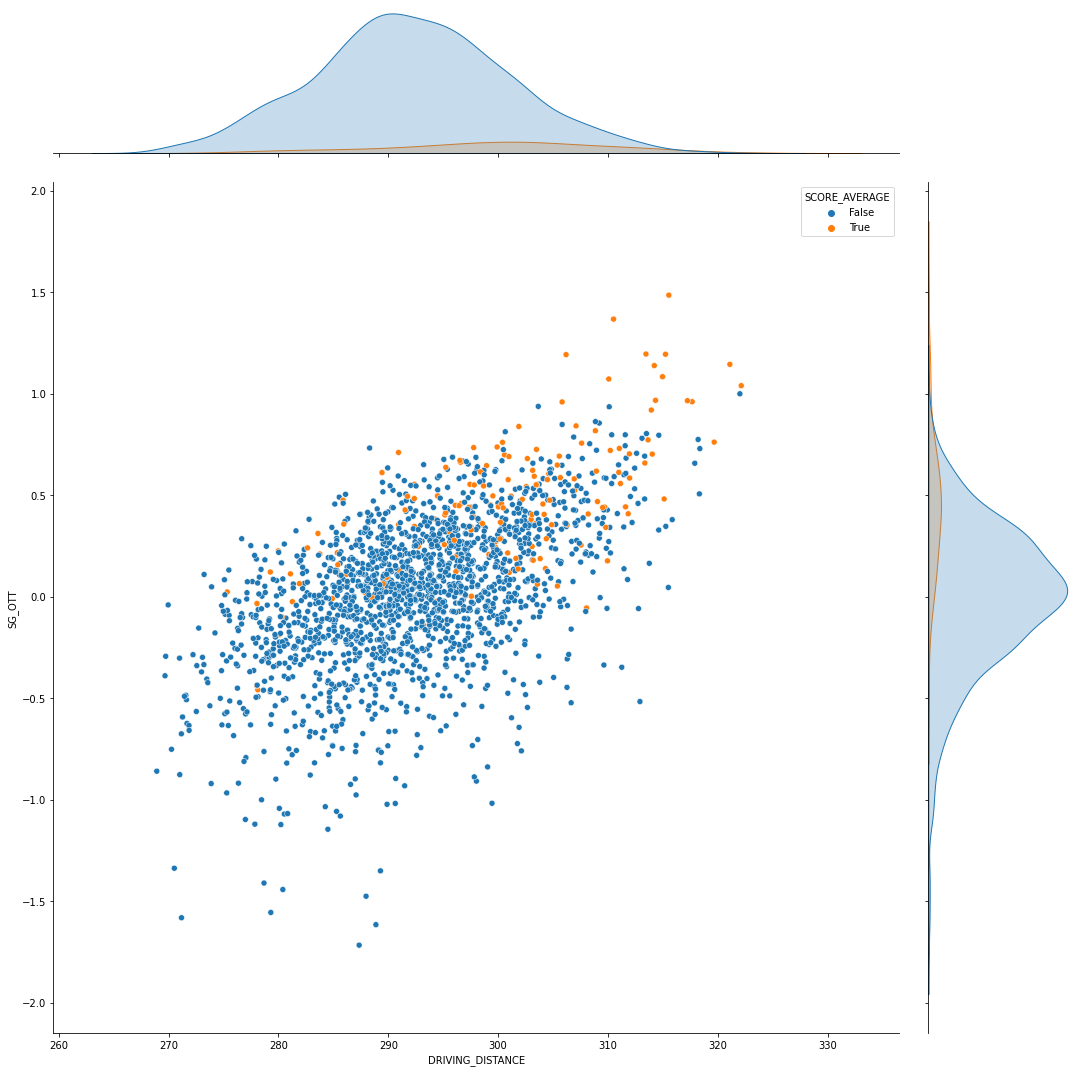

In [13]:
sns.jointplot(x= df.DRIVING_DISTANCE, y= df.SG_OTT, hue= df.SCORE_AVERAGE < 70, height= 15)

### COMMENTS:

### The visual shows us that indeed, in most cases, players with the longest drives are able to gain more strokes (deduct them from their overall score) with the driver. We can also see that the winners (orange dots) are among the cathegory of longest hitters.

## 2. The following visualitation differentiates golfers by driving range (DRIVING_DISTANCE) and accuracy (DRIVING_ACCURACY) Orange dots should have longer DRIVING_DISTANCE scores as we've seen in the first graph. By doing so, we will see if the longest hitters are able to keep their accuracy or not.

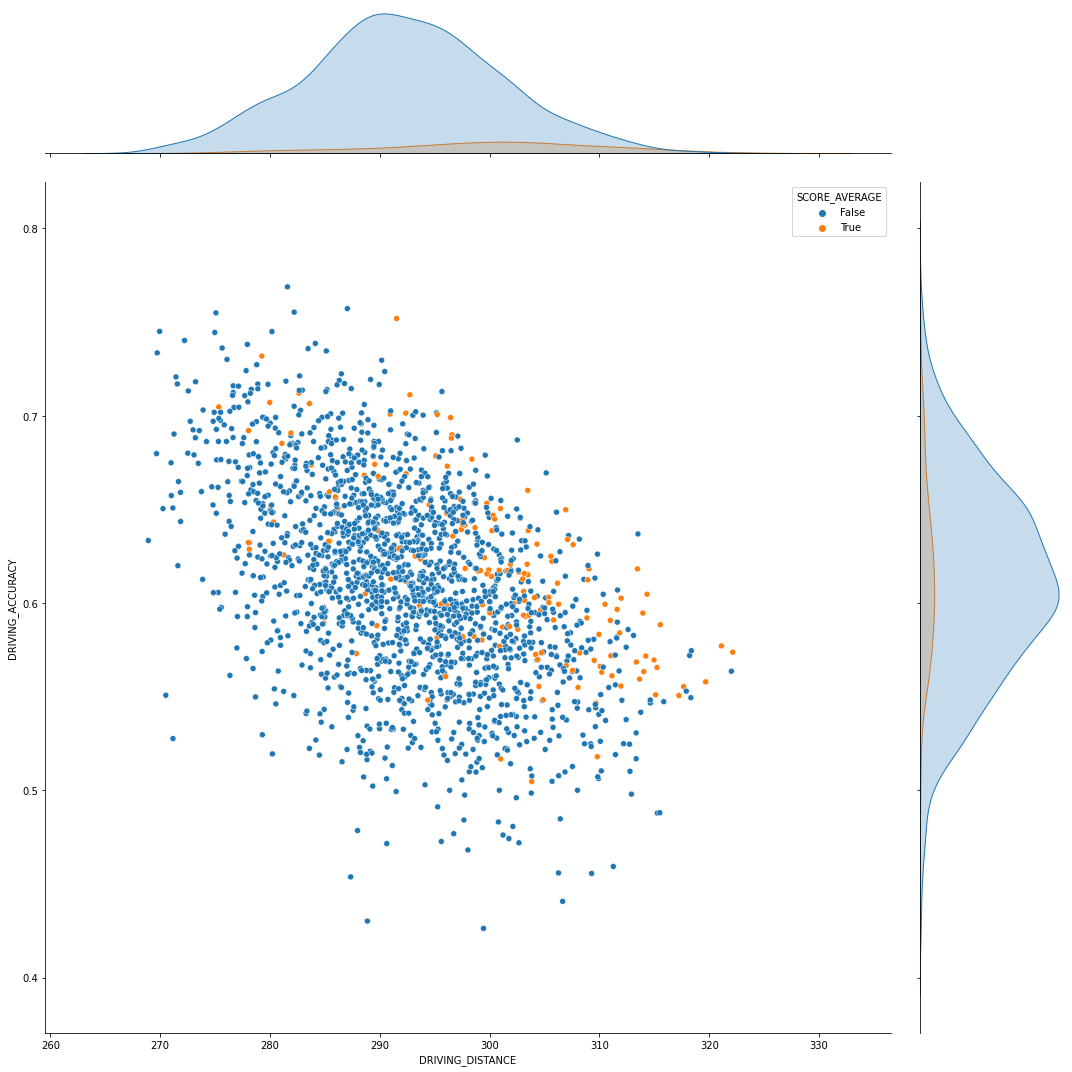

In [14]:
sns.jointplot(x= df.DRIVING_DISTANCE, y= df.DRIVING_ACCURACY, hue= df.SCORE_AVERAGE < 70, height= 15)

### COMMENTS: Wow, we can clearly obseve that the longer you hit, the less accurate your drive is. The best players are able to maintain themselves within the average of accuracy in the game, while being in the top range for long drivers.

## 3. The following graph will show us what the mean for SG during Putting is and where do top players stand in

<AxesSubplot:xlabel='SG_PUTTING', ylabel='Count'>

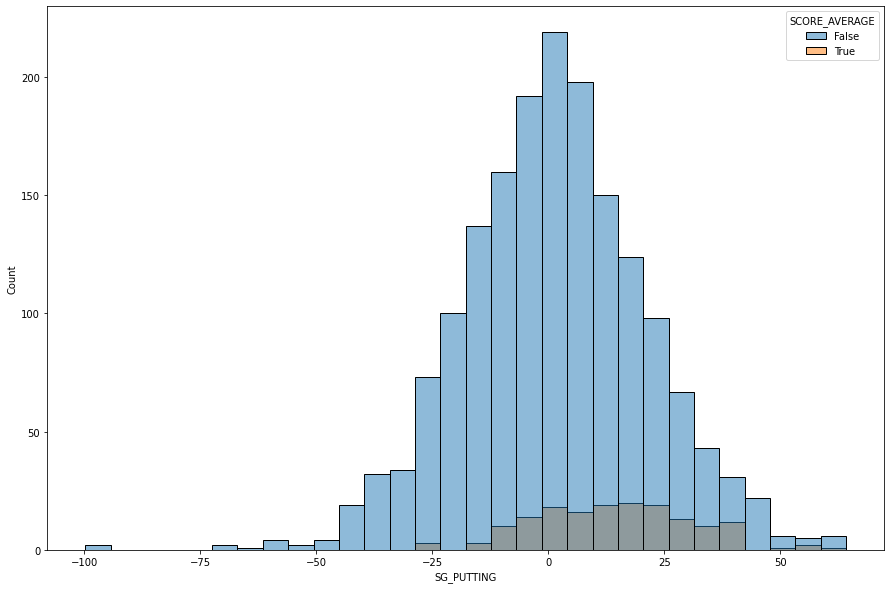

In [15]:
sns.histplot(x= df.SG_PUTTING, bins = 30 , hue= df.SCORE_AVERAGE < 70)

### COMMENTS: The mean is in 0 SG, as it should be. Top players are in the top range as expected, and then there is a small amount of players that are stunning in the putting green, some were even able to gain over 50 strokes.

## 4. Greens in regulation visual. This graph will show how many players get to the green 2 strokes under par

<AxesSubplot:xlabel='GREENS_IN_REGULATION', ylabel='Count'>

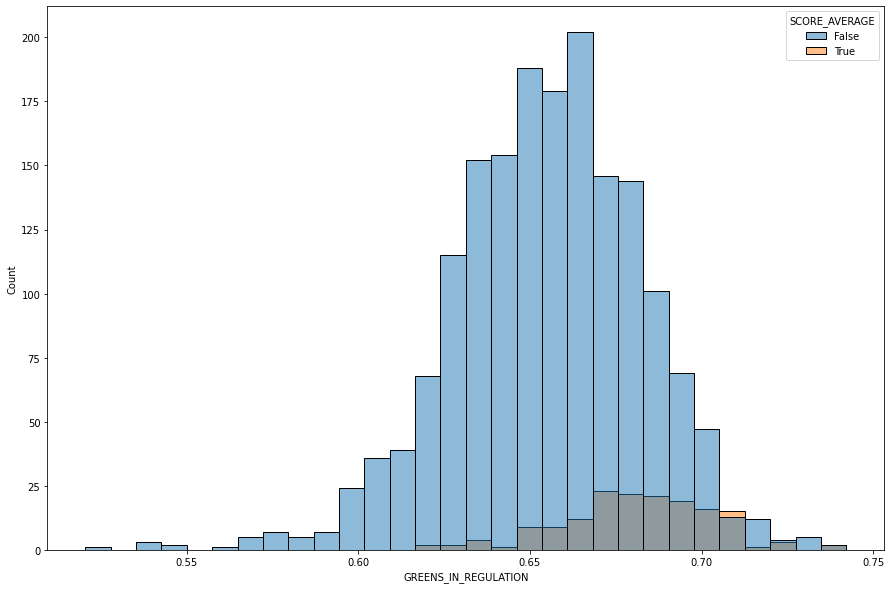

In [16]:
sns.histplot(x= df.GREENS_IN_REGULATION, bins = 30 , hue= df.SCORE_AVERAGE < 70)

### COMMENTS: Most players are able to maintain that standard during 66-67% of their game. Top players are in the higher range as expected

## 5. Best approachers??. In my opinion the most dificult skill in the game

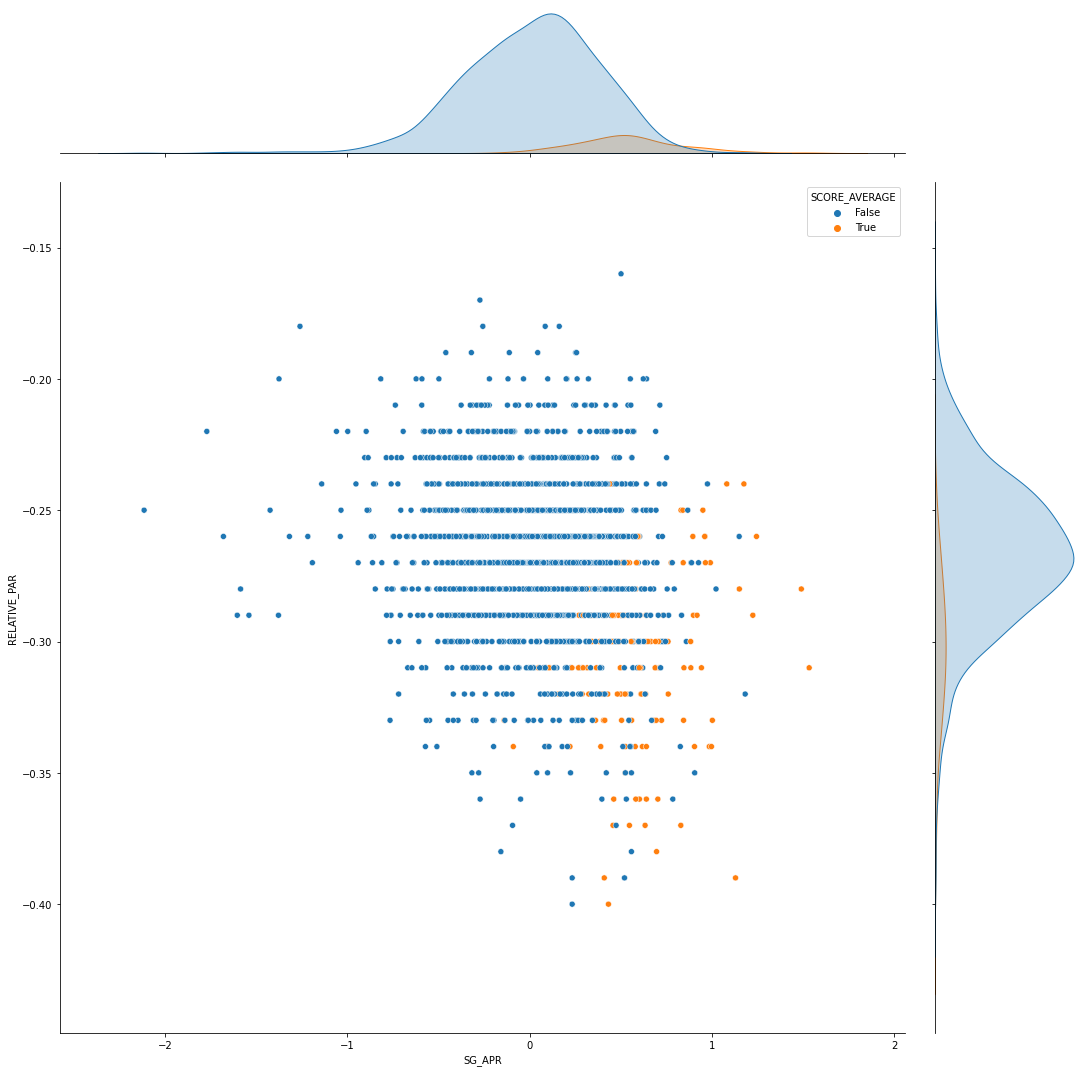

In [17]:
sns.jointplot(x= df.SG_APR, y= df.RELATIVE_PAR, hue= df.SCORE_AVERAGE < 70, height= 15)

<AxesSubplot:xlabel='SG_ARG', ylabel='Count'>

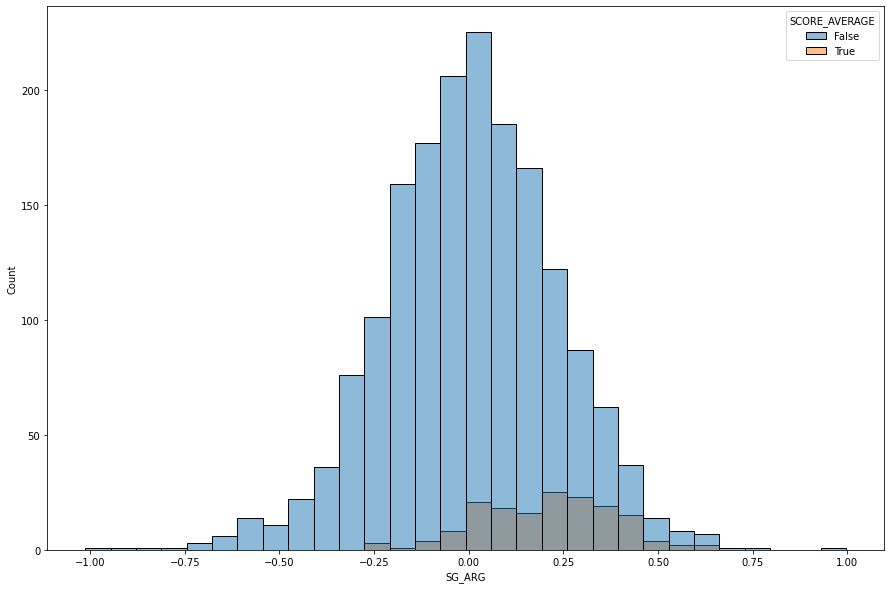

In [27]:
sns.histplot(x= df.SG_ARG, bins = 30 , hue= df.SCORE_AVERAGE < 70)

### COMMENTS: As both kdeplots show us, we can observe that the best players are clearly the best aproachers, meaning that they are the players who better aim with their irons. And top players, who are also the best aproachers also maintain the lower relative par average, meaning that they are the players who most score under par.

# 6. The following visuals are going to show a timeline of all stats in order to see if there has been any mayor improvement ing golf in the last 10 years:

Index(['ADJUSTMENT', 'HOLES', 'RELATIVE_PAR', 'SG_PUTTING', 'SG_OTT', 'SG_APR',
       'SG_ARG', 'TOP_10S', '1ST', '2ND', '3RD', 'SCORE_AVERAGE',
       'DRIVING_DISTANCE', 'DRIVING_ACCURACY', 'DRIVING_USAGE',
       'GREENS_IN_REGULATION', 'TOTAL_SG'],
      dtype='object')


IndexError: index 5 is out of bounds for axis 0 with size 5

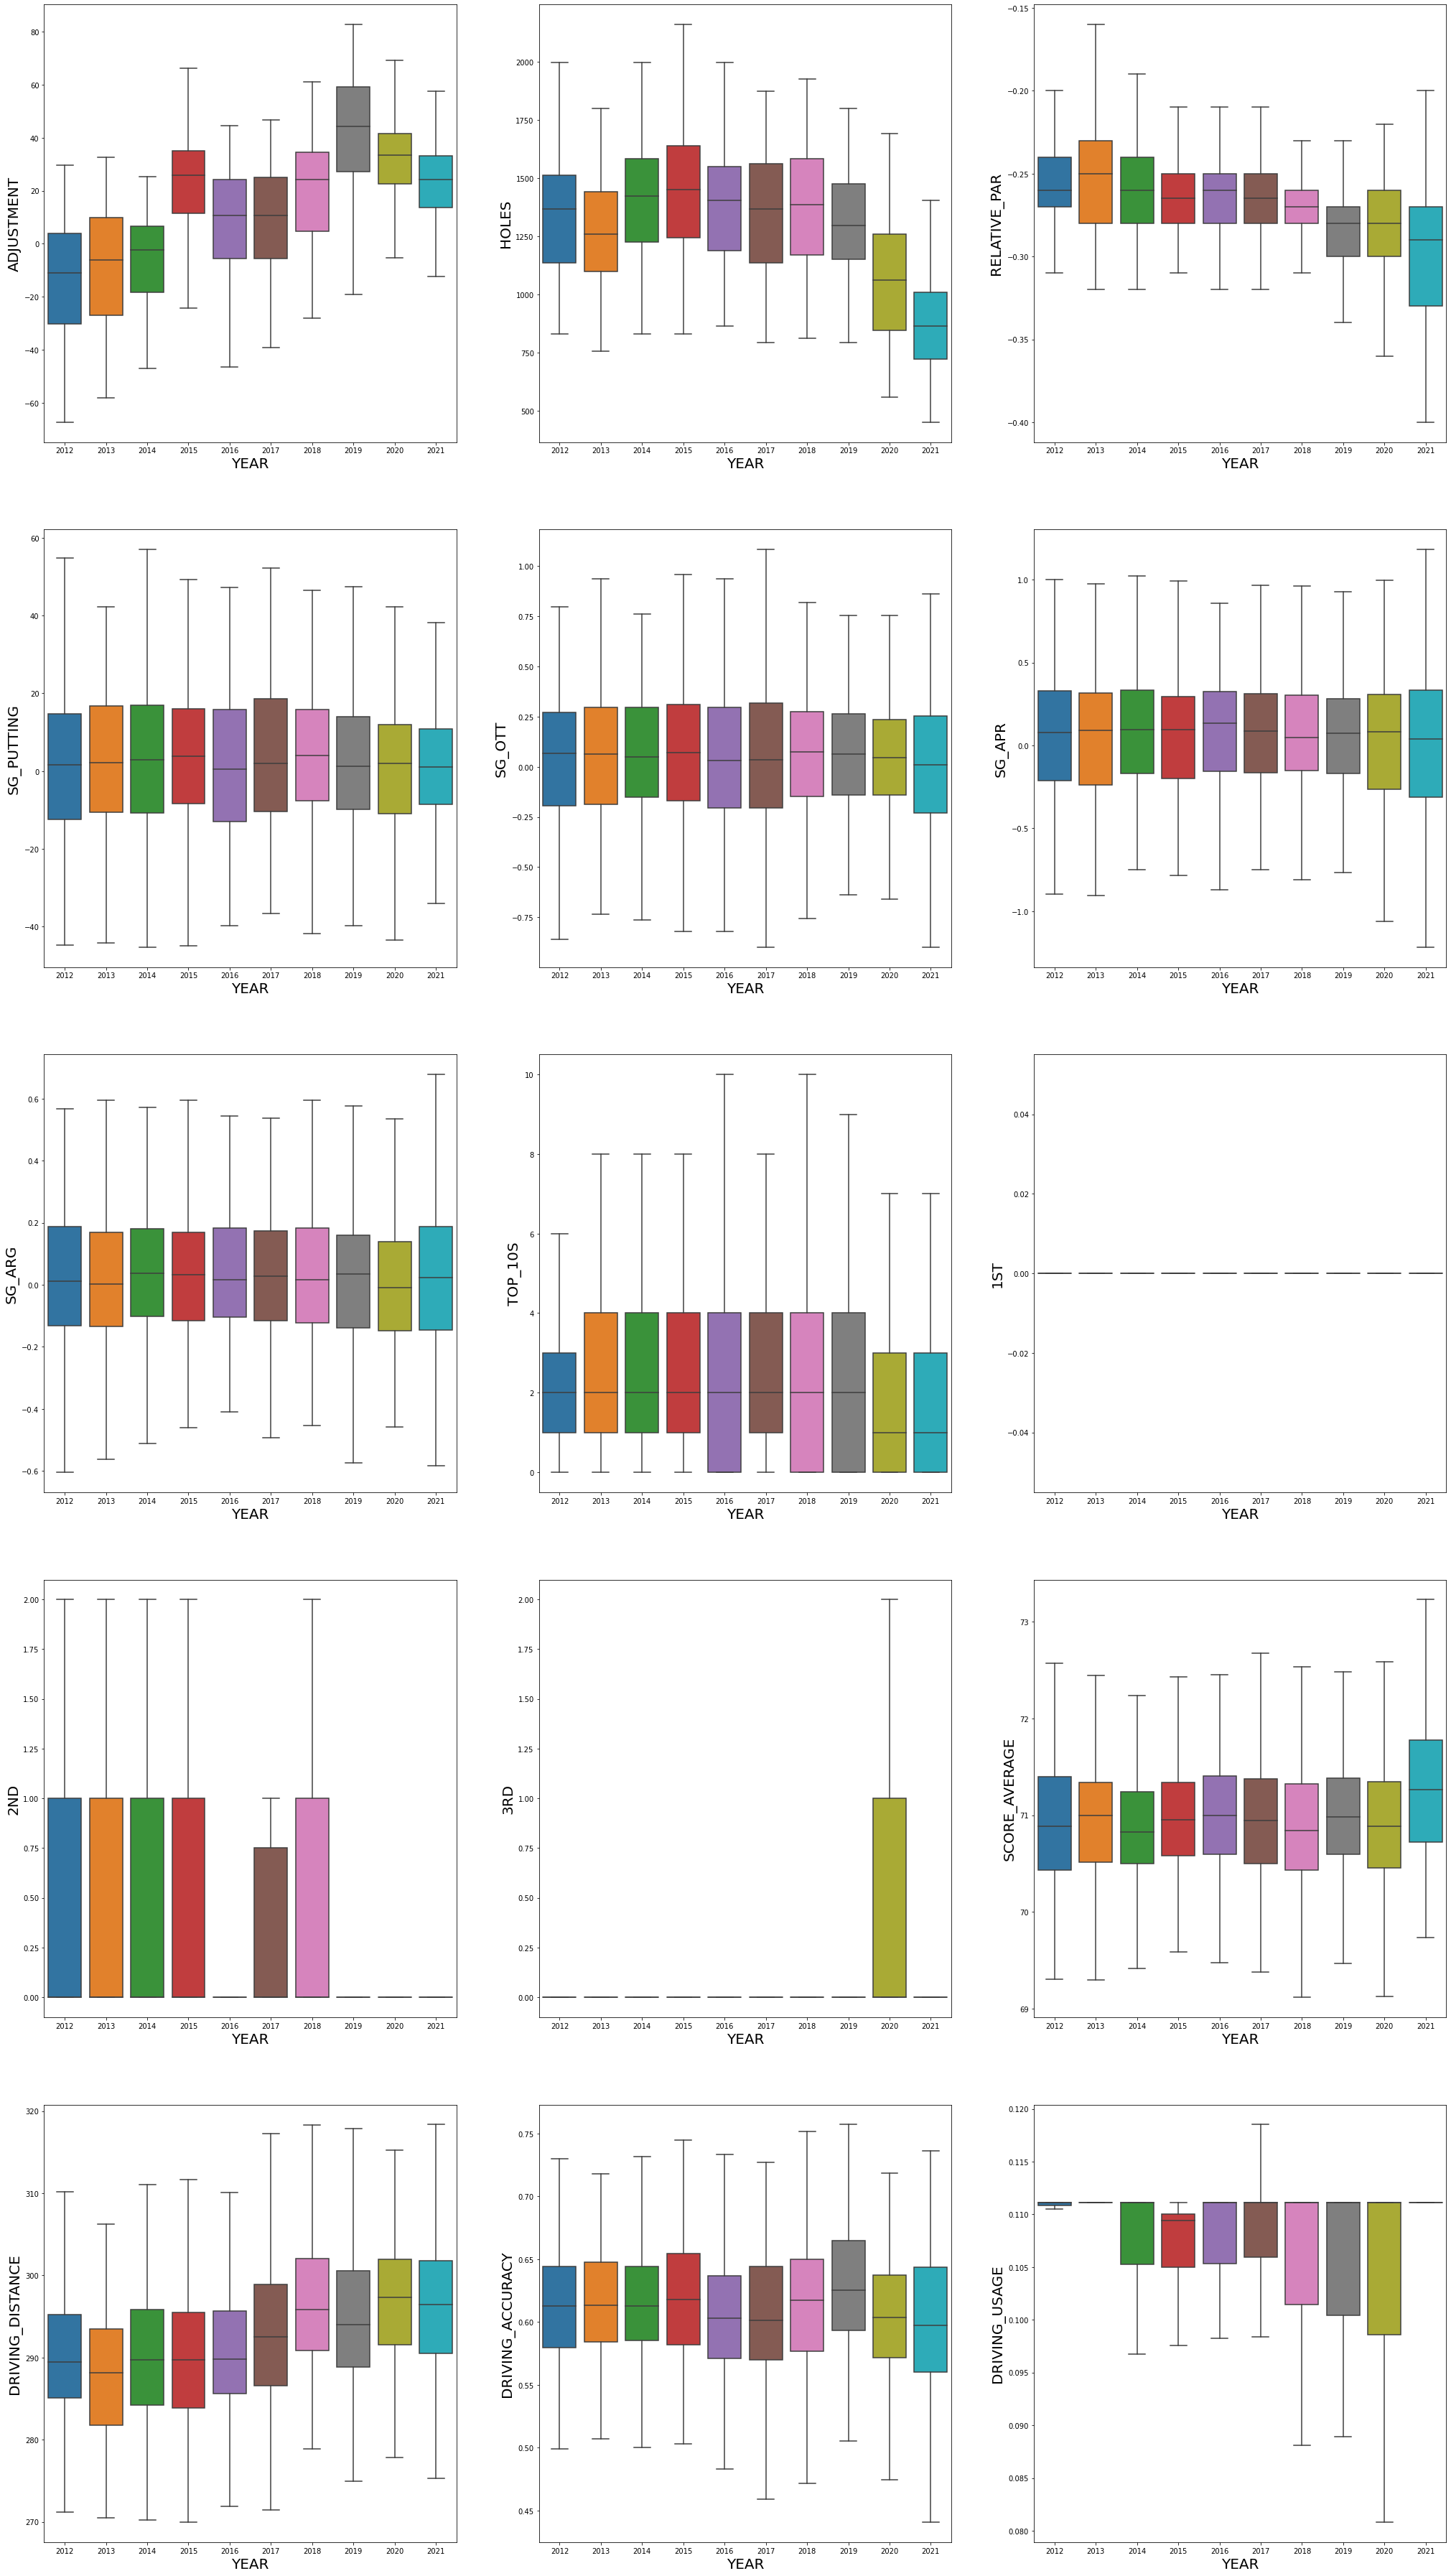

In [20]:
# Looking at the changes in statistics over time 
f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution = df.loc[:,(df.columns!='NAME') & (df.columns!='WINS')].columns
distribution = distribution[distribution != 'YEAR']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'YEAR', y = column, data=df, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('YEAR',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

# 7. Comparing top players vs average

In [22]:
# Defining the players that had a win or more in each year 
champion = df.loc[df['WINS'] >= 1, :]
print(champion.head())

           NAME  ADJUSTMENT   HOLES  RELATIVE_PAR  SG_PUTTING  SG_OTT  SG_APR  \
0  Rory McIlroy     -40.848   972.0         -0.33       2.336   1.072   1.002   
1   Tiger Woods     -58.454  1206.0         -0.29      16.282   0.553   1.224   
3  Jason Dufner     -35.636  1476.0         -0.29       9.777   0.553   0.519   
4   Matt Kuchar     -45.884  1476.0         -0.27      31.151   0.110   0.490   
6   Justin Rose     -45.636  1224.0         -0.25      -6.468   0.355   0.840   

   SG_ARG  WINS  TOP_10S  1ST  2ND  3RD  YEAR  SCORE_AVERAGE  \
0   0.273   4.0     10.0  4.0  2.0  1.0  2012      68.873185   
1   0.194   3.0      9.0  3.0  1.0  2.0  2012      68.903672   
3   0.222   2.0      8.0  2.0  1.0  0.0  2012      69.455659   
4   0.309   1.0      9.0  1.0  0.0  1.0  2012      69.477024   
6   0.567   1.0      8.0  1.0  1.0  1.0  2012      69.549471   

   DRIVING_DISTANCE  DRIVING_ACCURACY  DRIVING_USAGE  GREENS_IN_REGULATION  \
0        310.075472          0.566138       0.1090

IndexError: index 6 is out of bounds for axis 0 with size 6

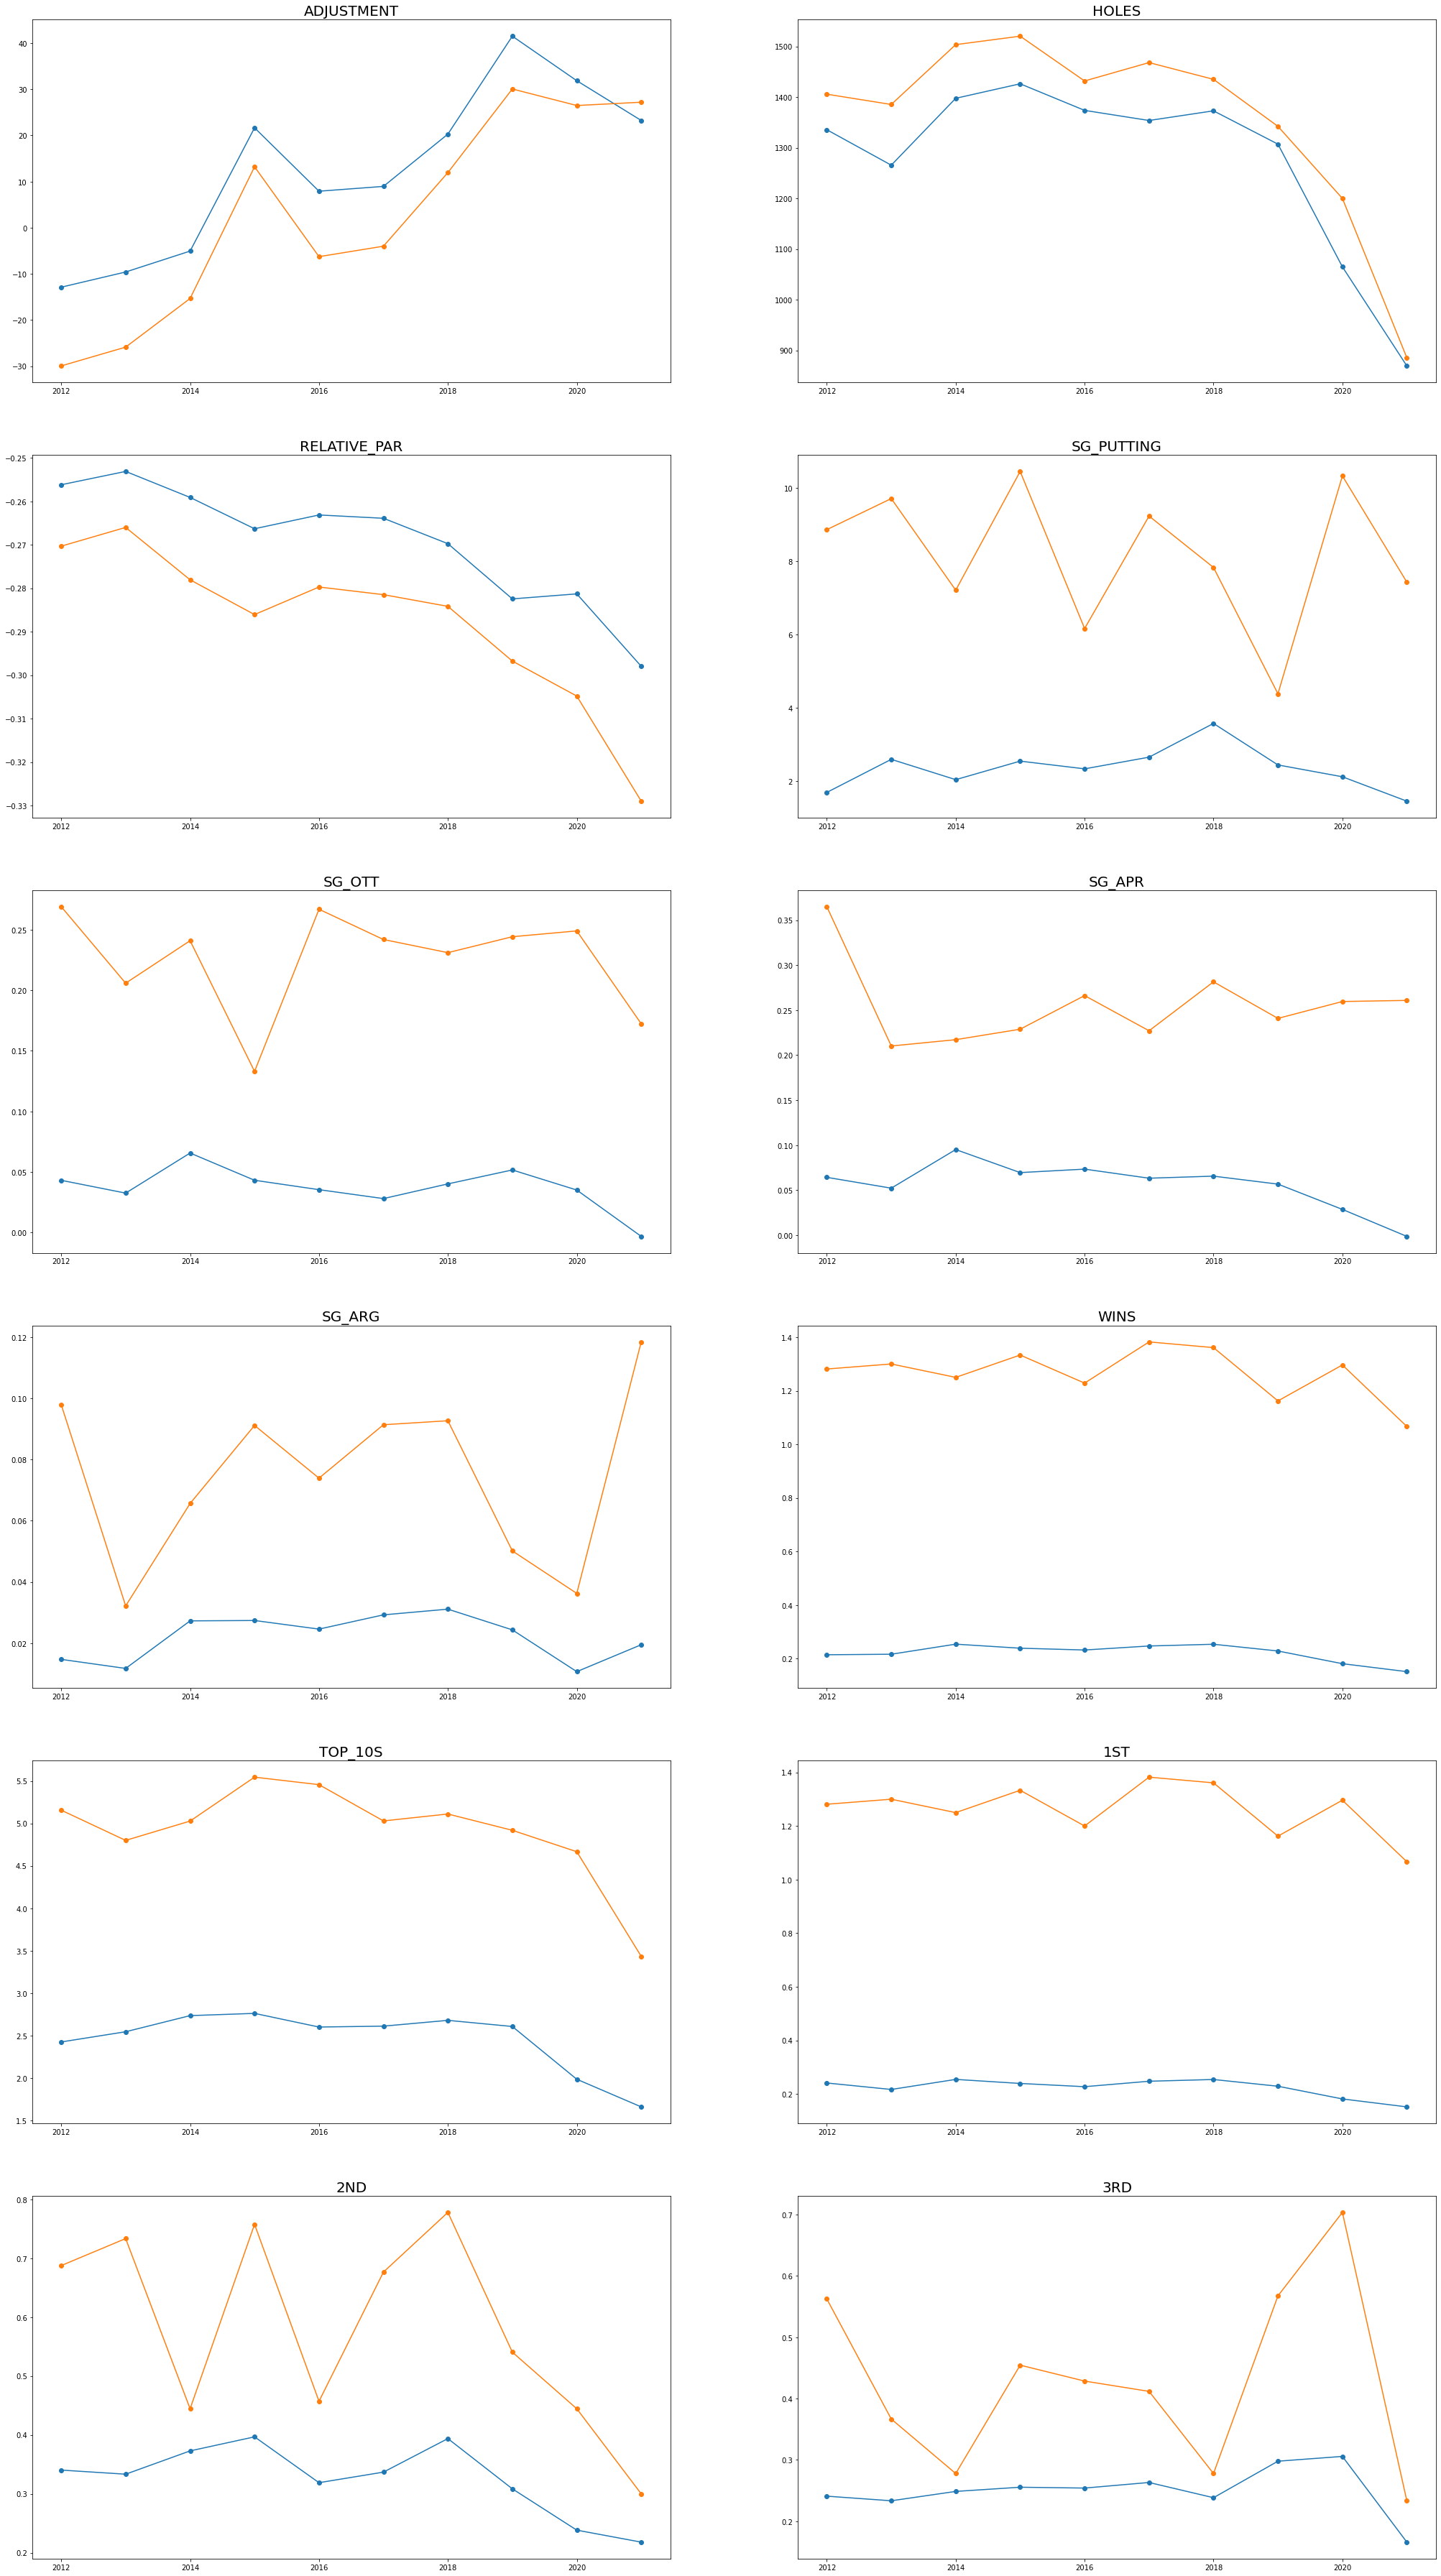

In [25]:
f, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(35,65))
distribution = df.loc[:,df.columns!='NAME'].columns
distribution = distribution[distribution != 'YEAR']

rows = 0
cols = 0
lower_better = ['SCORE_AVERAGE']
for i, column in enumerate(distribution):
    avg = df.groupby('YEAR')[column].mean()
    best = champion.groupby('YEAR')[column].mean()
    ax[rows,cols].plot(avg, 'o-',)
    ax[rows,cols].plot(best, 'o-',)
    ax[rows,cols].set_title(column, fontsize = 20)
    
    cols += 1
    if cols == 2:
        cols = 0
        rows += 1